# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of this year's survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I encourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [5]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

C:\Users\camla\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [7]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [8]:
pd.set_option('display.max_columns', 358)

In [9]:
# your code here
df[df['_STATE'].isin([9,34,36])].shape

#It seems like the subset of cities that we are interested in composes the entire DataFrame. How lucky!

(34545, 358)

In [10]:
df['_STATE'].value_counts()

36.0    12249
34.0    11708
9.0     10588
Name: _STATE, dtype: int64

Now check to see how large our subset df.

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [11]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [12]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [13]:
#your code here

# Look at the codebook in order to make determinations! 
# The number 88 actually corresponds to a value of 0. The number 77 corresponds to a 'I'm not sure' response. The number 99 means the subject refused to answer
# With this in mind, lets replace all values of 88 with 0, and all values of 77 and 99 with np.nan to refelct their lack of affect on the data
# I will replace all of them with null values

df['PHYSHLTH'] = df['PHYSHLTH'].replace([88, 77, 99], [0, np.nan, np.nan])   # I am making an assumption that those that the filled in nonsense values indicated a zero value
# Also 88 made up 21k of the values, so I can't really get rid of it or my remaining DataFrame won't be representative of the data

In [14]:
df['PHYSHLTH'].isna().sum()       # So we have 798 rows to remove from the DataFrame

798

In [15]:
print(df['PHYSHLTH'].value_counts(), df['PHYSHLTH'].describe())

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64 count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64


## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [16]:
df = df.dropna(subset=['PHYSHLTH']) # This will drop all rows in the dataframe that have a np.nan null value in their ['PHYSHLTH'] column

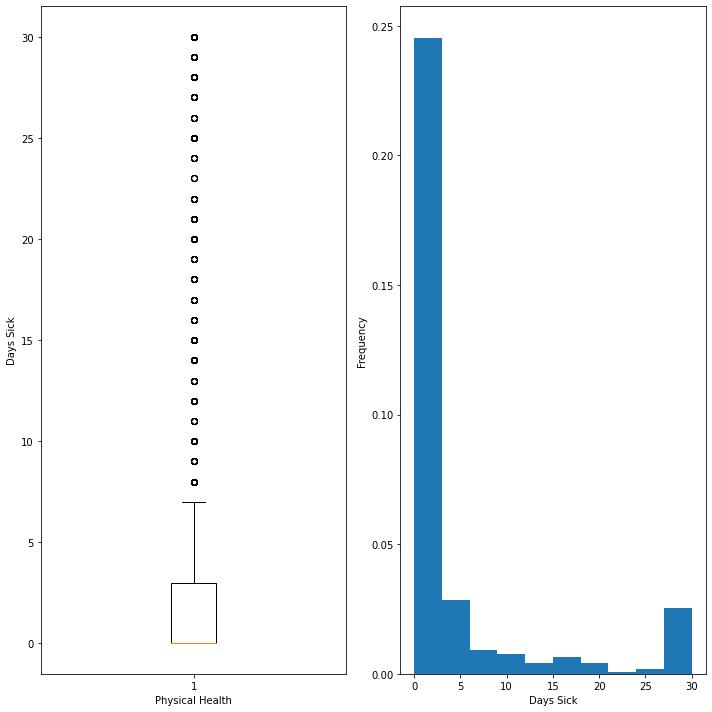

In [29]:
# Boxplot shows the descriptive statistics!!!
# Histogram shows the distribution of the data!!!

fig, ax = plt.subplots(1, 2, figsize = (10,10))

# Add a boxplot for the "Height" column in the DataFrames
ax[0].boxplot(df['PHYSHLTH'])
ax[0].set_xlabel('Physical Health')
ax[0].set_ylabel('Days Sick')


ax[1].hist(df['PHYSHLTH'], density=True)
ax[1].set_xlabel('Days Sick')
ax[1].set_ylabel('Frequency')

fig.tight_layout()
plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [63]:
# code to calculate the average number of sick days by state
df.groupby('_STATE').mean()['PHYSHLTH']



# means = df.groupby('_STATE')['PHYSHLTH'].mean().values


_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

<BarContainer object of 3 artists>

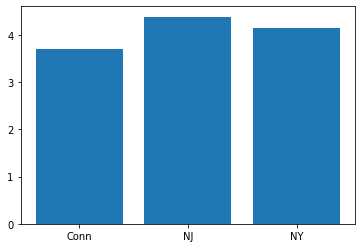

In [64]:
# code to graph tho,se averages using matplotlib
states = ['Conn', 'NJ', 'NY']
means = df.groupby('_STATE').mean()['PHYSHLTH'].values


fig, ax = plt.subplots()
ax.bar(states, means)

(array([3.28182890e-01, 5.30481644e-02, 2.80397440e-02, 1.26305153e-02,
        1.85247558e-03, 1.17884810e-02, 1.30515325e-03, 1.54092287e-02,
        3.36813742e-04, 3.78915460e-04, 7.36780061e-03, 1.68406871e-04,
        2.48400135e-03, 5.05220613e-04, 3.65021893e-02]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30.]),
 [<matplotlib.patches.Polygon at 0x21834107790>])

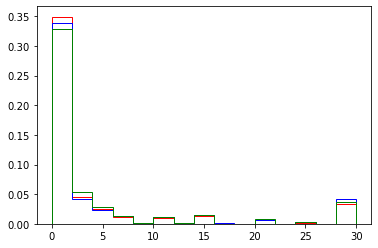

In [78]:
# graphic showing the histogram of data
# THIS IS BASICALLY ASKING FOR A HISTOGRAM LIKE YOU DID ABOVE, BUT ONE THAT IS DIVIDED BY STATE. Plot multiple histograms on the same plot!
fig, ax = plt.subplots()
ax.hist(df[df['_STATE']==9]['PHYSHLTH'], bins=15, density=True, color='red', histtype='step')
ax.hist(df[df['_STATE']==34]['PHYSHLTH'], bins=15, density=True, color='blue', histtype='step')
ax.hist(df[df['_STATE']==36]['PHYSHLTH'], bins=15, density=True, color='green', histtype='step')


# How can I determine the proper number of bins?


## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [95]:
# code to create new colum for chronically sick

df['chron'] = np.where(df['PHYSHLTH']>=12, 1, 0)

# This np.where() function will iterate through the array and check each value to see if it meets our condition of being greater than 12 (apparently that's the cutoff number we are using to determine if people are chronically sick)
# It will put a 1 where the condition is True, and a 0 where the condition is False

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [96]:
# code to calculate averages per state
# Because of how we structured the 'chron' series, if we average the values for each state in the chron section, the mean value that we recieve
# will also be the percentage of people labeled as sick

# Ex. --> 10 people in total. Sick vs not sick --> [0, 1, 1 ,1 ,1, 0, 0, 0, 1, 0]
#                                       sum of sick (all the 1s) = 5
#                                                               total # of values = 10
#                                                                            %sick = 5/10 = .50 = 50%

df.groupby('_STATE')['chron'].mean()

_STATE
9.0     0.114568
34.0    0.139117
36.0    0.128915
Name: chron, dtype: float64

Text(0.5, 1.0, 'Chronically Sick as % of Total State Population')

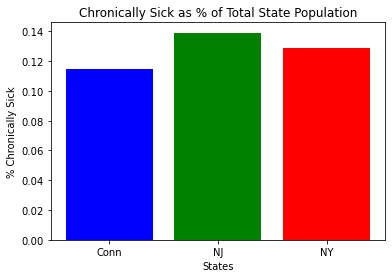

In [99]:
# create graphic to compare chronically sick by state
percents = df.groupby('_STATE')['chron'].mean().values

fig, ax = plt.subplots()

ax.bar(states, percents, color = ['blue', 'green', 'red'])
ax.set_xlabel('States')
ax.set_ylabel('% Chronically Sick')
ax.set_title('Chronically Sick as % of Total State Population')

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [112]:
# According to the databook:
# 1 = Everyday, 2 = Some days, 3 = Not at all, 7 = Don't know/not sure, 9 = Refused to answer
x = df['SMOKDAY2'].isna().sum()
y = len(df['SMOKDAY2'])
percent = x/y
print(f'Number of missing values: {x}')
print(f'Total number of values: {y}')
print(f'Percent of values that are missing: {percent}')

# We also need to look at the "SMOKE100" column. We need to blend this column with the 'SMOKDAY2' column.




Number of missing values: 20279
Total number of values: 33747
Percent of values that are missing: 0.6009126737191454


In [ ]:
# code to graph those proportion of differen smoking groups using matplotlib


In [ ]:
# your code here

In [ ]:
#graph showing the breakdown of smokers per state

In [ ]:
# code to graph these averages sick days for each category of smoking status

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [ ]:
# code here to clean up the ALCDAY5 responses


In [ ]:
#descriptive statistics of cleaned data

In [ ]:
# graphic showing the histogram of data


In [ ]:
# code to calculate averages per state


In [ ]:
# Code to calculate correlation of between number of dirnks of number of days physically ill

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

-  Create a 95% confidence interval for the true proportion of chronically sick people.

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following steps for each question:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### 9.A The following questions are regarding the `PHYSHLTH` variable. 
1. What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
3. Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


### 9.B The following questions are regarding the  `CHRONIC` variable.
1. What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?
3. Perform a statistical test to determine if there is a statistically significant difference in cproportion of people with chronic health issues from the three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 


**Select a continuous variable from the survey questions as you dependent variable and perform the following:**
  1. Determine the sample mean and sample standard deviation
  2. Create a confidence interval for a population mean.
  3. Perform a two-sample test of means for gender.
  4. Perform a one-way ANOVA using your categorical independent variable.

**Select/create a binary variable from the survey questions as you dependent variable and perform the following:**
  1. Create a confidence interval for a population proportion.
  2. Perform a two proportions z-test using gender.
  3. Perform a Chi-Square test using your categorical independent variable.